## Ch 4: Building Good Training Datasets -- Data Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

###### Identifying missing values in tabular data

In [2]:
# Creating simple example dataframe from a CSV
from io import StringIO

csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

In [3]:
csv_data

'A,B,C,D\n1.0,2.0,3.0,4.0\n5.0,6.0,,8.0\n10.0,11.0,12.0,'

In [4]:
df = pd.read_csv(StringIO(csv_data)) # StringIO allows us to read the list as if it were a CSV file

In [5]:
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [6]:
df.isnull().sum() # Can use the isnull().sum() methods to returns the total # of NULLs --> isnull() converts to T/F

A    0
B    0
C    1
D    1
dtype: int64

In [7]:
df.values # Scikit-learn was made to handle NumPy arrays but generally works well with Pandas dataframes

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

###### Eliminating training examples or features w/ missing values

In [8]:
# Removing rows or columns w/ NULLs is easy but limits training/testing data

In [9]:
df.dropna(axis=0) # axis = row = x

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [10]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [11]:
df.dropna(how='all') # will only drop rows where all columns are NaN

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [12]:
# drop rows that have fewer than 4 real values
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [13]:
# only drop rows where NaN appear in specific columns
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


###### Inputing missing values

In [14]:
# Can use interpolation techniques to estimate missing values from other training examples in our dataset

- Mean imputation - replacing missing value w/ mean value

In [15]:
# Mean imputation w/ SimpleImputer class
from sklearn.impute import SimpleImputer

imr = SimpleImputer(missing_values=np.nan, strategy='mean') # Could possibly describe missing_values as anything?
    #...some other options for strategy: 'median', 'most_frequent' --> 'most_frequent' is useful for categorical data
    # keep in mind that the strategy is based on the feature (column), not the row
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)

print(f'df.values: \n {df.values}')
print('\n')
print(f'imputed_data: \n {imputed_data}')

df.values: 
 [[ 1.  2.  3.  4.]
 [ 5.  6. nan  8.]
 [10. 11. 12. nan]]


imputed_data: 
 [[ 1.   2.   3.   4. ]
 [ 5.   6.   7.5  8. ]
 [10.  11.  12.   6. ]]


In [16]:
# A more convenient way of imputing missing values
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


### Handling Categorical Data

***
- Ordinal: can be ordered (t-shirt size)
- Nominal: cannot be ordered (colors)

In [17]:
# Create a dataframe with categorical data
df = pd.DataFrame([['green', 'M', 10.1, 'class2'], 
                   ['red', 'L', 13.5, 'class1'], 
                   ['blue', 'XL', 15.3, 'class2']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [18]:
# Map categorical ordinal values to integers
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [19]:
# to reverse the size mapping we can apply the inverse
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping) # .map() matches the dictionary key to the df and changes the df value to the dict value

0     M
1     L
2    XL
Name: size, dtype: object

In [20]:
size_mapping.items()

dict_items([('XL', 3), ('L', 2), ('M', 1)])

In [21]:
inv_size_mapping

{3: 'XL', 2: 'L', 1: 'M'}

#### Encoding Class Labels

- Class labels are the nominal categorical values
- Most ML algorithms can map a value to the label automatically but it is good to do it manually to be aware
- Since no order, doesn't matter how you map the value just need to know what is mapped where

In [22]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [23]:
np.unique(df['classlabel'])

array(['class1', 'class2'], dtype=object)

In [24]:
for x in enumerate(np.unique(df['classlabel'])): print(x)

(0, 'class1')
(1, 'class2')


In [25]:
enumerate(np.unique(df['classlabel']))

# This link provides some context on why only a hash value is returned: 
#... https://stackoverflow.com/questions/51561509/why-is-the-output-not-printing-when-using-printiterable

In [26]:
# Transform class labels into integers in dataframe
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,1
1,red,2,13.5,0
2,blue,3,15.3,1


In [27]:
# reverse the class label mapping
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


In [28]:
# To map labels back to original can use the method previously or can just use sklearn
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
# fit_transform is just shortcut for calling fit and transform separately
y

array([1, 0, 1])

In [29]:
df['classlabel'].values

array(['class2', 'class1', 'class2'], dtype=object)

In [30]:
class_le.inverse_transform(y)

array(['class2', 'class1', 'class2'], dtype=object)

#### Performing one-hot encoding on nominal features

In [31]:
# Could use scikit-learn's LabelEncoder() on nominal data
X = df[['color', 'size', 'price']].values # just created a copy of the df for demonstration

color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0]) # changed all values of first column (green, red, blue)
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

- The problem with the above is that our ML algorithm could think deem the column of colors (nominal values) as having some order based on their encoding
    - This is where one-hot encoding is used
    - The idea behind one-hot encoding is to create a new feature for each unique value of the nominal values and treat the new features as dummy variables for which ever color they wish to indicate

In [32]:
from sklearn.preprocessing import OneHotEncoder

X = df[['color', 'size', 'price']].values
X

array([['green', 1, 10.1],
       ['red', 2, 13.5],
       ['blue', 3, 15.3]], dtype=object)

In [33]:
color_ohe = OneHotEncoder()
color_ohe.fit_transform(X[:, 0].reshape(-1, 1)).toarray() # Creates a new column for each unique color w/ dummy variables

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [34]:
# ^^^ we only modified columns in a one features array (X[:, 0])
# to selectively transform columns in a multi-feature array, we can use ColumnTransformer
#... ColumnTransformer accepts a list of (name, transformer, columns) tupes

from sklearn.compose import ColumnTransformer

X = df[['color', 'size', 'price']].values
c_transf = ColumnTransformer([
    ('onehot', OneHotEncoder(), [0]), # Apply OneHotEncoder() to the first column
    ('nothing', 'passthrough', [1, 2]) # Do nothing for the other columns
])

c_transf.fit_transform(X).astype(float)

array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [35]:
# Can also use Pandas for one-hot encoding
# Pandas get_dummies method will only convert string columns and leave all other columns unchanged
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


- When we use one-hot encoding we have to keep in mind that this introduces multi-collinearity
    - This can be an issue for certain methods (ex: methods that require matrix inversion)
        - Matrices that are highly correlted are computationally difficult to invert, which can lead to numerically unstable estimates
    - To reduce the correlation among variables, we can simply remove one feature column from the one-hot encoded array --> don't lose any information since all other color columns being zero one indicate the dropped feature would've been 1

In [36]:
# drop one color column of the created dummy variable columns
pd.get_dummies(df[['price', 'color', 'size']], drop_first=True)

,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [37]:
# Can do this via OneHotEncoder() by setting drop='first' and categories='auto'
color_ohe = OneHotEncoder(categories='auto', drop='first')
c_transf = ColumnTransformer([
    ('onehot', color_ohe, [0]),
    ('nothing', 'passthrough', [1, 2])
])

c_transf.fit_transform(X).astype(float)

array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

#### Encoding Ordinal Features

- If we are unsure about the numerical differences between categories or ordinal features, we can encode them using a threshold encoding with 0/1 values
- Ex: we can split the feature 'size' with values M, L, and XL into 2 new features 'x > M' and 'x > L'

In [38]:
df = pd.DataFrame([['green', 'M', 10.1, 'class2'], 
                   ['red', 'L', 13.5, 'class1'], 
                   ['blue', 'XL', 15.3, 'class2']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [39]:
df['x > M'] = df['size'].apply(lambda x: 1 if x in {'L', 'XL'} else 0)
df['x > L'] = df['size'].apply(lambda x: 1 if x == 'XL' else 0)

del df['size']
df

,color,price,classlabel,x > M,x > L
0,green,10.1,class2,0,0
1,red,13.5,class1,1,0
2,blue,15.3,class2,1,1


### Partitioning a dataset into separate training and test datasets 

In [40]:
# Get wine dataset from open source directory
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

In [41]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [42]:
# define column headers
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols'
                  ,'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue'
                  ,'0D280/0D315 of diluted wines', 'Proline']

In [43]:
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,0D280/0D315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [44]:
# What are the unique classes --> each class refers to a type of grape
print('Class labels', np.unique(df_wine['Class label']))

Class labels [1 2 3]


In [45]:
# Randomly partition dataset into training and test sets
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
# stratify=y ensures that same proportion of each class ('y') are in the train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [46]:
df_wine.iloc[:, 1:].values # all rows after the first column (after class label)

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [47]:
df_wine.iloc[:, 0].values # just the class labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

- Commonly used splits for train/test data are 60:40, 70:30, and 80:20
- For large datasets can increase your train %

#### Feature Scaling

- Decision trees and random forest are two of the few ML algorithms that don't need feature scaling

In [48]:
# Min-max scaling feature normalization
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train) # Fit and transformed trained data
X_test_norm = mms.transform(X_test) # is transformed by the fit of the trained data

In [49]:
# comparing min max normalization vs standardization
ex = np.array([0, 1, 2, 3, 4, 5])
standardized = (ex - ex.mean()) / ex.std()
normalized = (ex - ex.min()) / (ex.max() - ex.min())
pd.DataFrame({'standardized': standardized, 'normalized': normalized}, index=ex)

,standardized,normalized
0,-1.46385,0.0
1,-0.87831,0.2
2,-0.29277,0.4
3,0.29277,0.6
4,0.87831,0.8
5,1.46385,1.0


In [50]:
# Standardization feature scaling
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test) # is transformed by the fit of the trained data

- Other more advanced methods of feature scaling exist and are available in scikit-learn

#### Selecting Meaningful Features

In [51]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1' # L1 regularization (lasso), helps w/ feature selection
                        , C=1.0, solver='liblinear', multi_class='ovr')
# C=1.0 is the default: can increase or decrease to make the regularization effect stronger or weaker, respectively
lr.fit(X_train_std, y_train)
print('Training accuracy: ', lr.score(X_train_std, y_train))
print('Test accuracy: ', lr.score(X_test_std, y_test))

Training accuracy:  1.0
Test accuracy:  1.0


In [52]:
lr.intercept_
# since we fit the "lr" object on a multi-class dataset via "one-versus-rest"
# 1st intercept = class 1 vs classes 2 and 3
# 2nd intercept = class 2 vs classes 1 and 3

array([-1.26375158, -1.21603601, -2.36982942])

In [53]:
lr.coef_ # access the weight array
# contains 3 lists of 13 weight coefficients (1 list per class, 1 coeffcient per feature)
# can see which features are irrelevant if their weight is zero for each class list
# can increase the prevelance of irrelevant features (0 weights), by increasing the regularization strenght, "C"

array([[ 1.24542084,  0.18071249,  0.74515305, -1.16268644,  0.        ,
         0.        ,  1.1599802 ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55644909,  2.50930699],
       [-1.53691014, -0.38732853, -0.9954444 ,  0.36511157, -0.059475  ,
         0.        ,  0.66792391,  0.        ,  0.        , -1.93435133,
         1.23315571,  0.        , -2.23145819],
       [ 0.13547103,  0.16881065,  0.35721196,  0.        ,  0.        ,
         0.        , -2.43724225,  0.        ,  0.        ,  1.56375163,
        -0.81886847, -0.49306243,  0.        ]])

In [54]:
# model and lists to plot for varying regularization strengths
weights , params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c # varying regularization strengths
                           , solver='liblinear', multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1]) # weight for the "Alcohol" feature
    params.append(10**c)

In [55]:
weights

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-0.76611527, -0.04063145,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.8239872 ,
         0.00697554,  0.06465689, -0.41580242]),
 array([-1.53722377, -0.38703221, -0.99513708,  0.36493139, -0.05955851,
         0.        ,  0.66795612,  0.        ,  0.        , -1.93393651,
         1.23386892,  0.        , -2.23181947]),
 array([-2.69263309, -1.09953732, -2.84331945,  1.43730115,  0.        ,
         0.        ,  1.88048254,  0.96971898,  0.        , -6.06540983,
         2.38415618,  0.        , -5.36610108]),
 array([ -4.33653058,  -1.99295502,  -5.00694069,   2.60767527,
         -0.14802288,   0.        ,   3.42348514,   2.00245197,
          0.        , -12.4369473 ,   3.93535103,   0.13787688,
        -10.72314817]),
 array([ -6.0

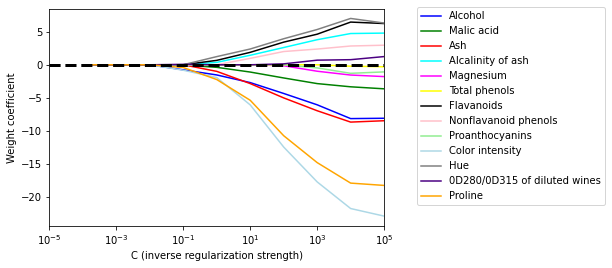

In [56]:
weights = np.array(weights) # convert to numpy array

# Will plot varying regularization strengths
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink'
          , 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], label=df_wine.columns[column + 1], color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight coefficient')
plt.xlabel('C (inverse regularization strength)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

 - all feature weights will be zero if we penalize the model with a strong regularization parameter (C < 0.01)
     - C is the inverse of the regularization parameter, lambda

In [57]:
f'weights.shape[0] (rows): {weights.shape[0]}'
f'weights.shape[0] (columns/features): {weights.shape[1]}'

'weights.shape[0] (columns/features): 13'

#### Sequential backward selection (SBS): feature selection algorithm

In [58]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [59]:
class SBS:
    def __init__(self, estimator, k_features, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

- notes on above code:
- k_features parameter specifies the desired # of features to reduce down to
- inside the while loop of the 'fit' method:
    - feature subsets created by itertools.combination are evaluated and reduced until the feature subset has the desired dimensionality
    - in each iteration, the accuracy score of the best subset is collected in a list, self.scores_, based on the interally created test dataset, X_test
        - Will use those score to evaluate the results
- the column indices of the final feature subset are assigned to self.indices_, which we can use via the transform method to return a new data array with the selected features
- instead of calculating the criterion explicitly inside the 'fit' method, we simply removed the feature that is not contained in the best performing feature subset

In [60]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1) # reduce to only most predictive feature
sbs.fit(X_train_std, y_train)

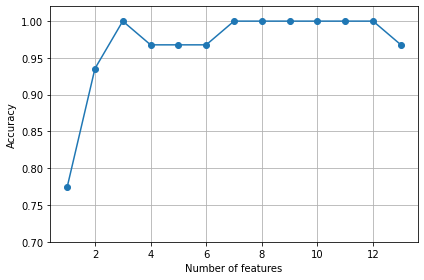

In [61]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

- notes on above graph:
- accuracy of KNN improved as # of features were reduced (curse of dimensionality)
- classifier achieved 100% accuracy for models with many different #s of features (minimum being 3)

In [69]:
# the column index of features in each subset as they get whittled down
sbs.subsets_

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11),
 (0, 1, 2, 3, 4, 5, 6, 7, 9, 11),
 (0, 1, 2, 3, 4, 5, 7, 9, 11),
 (0, 1, 2, 3, 5, 7, 9, 11),
 (0, 1, 2, 3, 5, 7, 11),
 (0, 1, 2, 3, 5, 11),
 (0, 1, 2, 3, 11),
 (0, 1, 2, 11),
 (0, 1, 11),
 (0, 11),
 (0,)]

In [70]:
k3 = list(sbs.subsets_[10]) # selecting the tuple that contains 3 features (10th out of 13 total)
print(df_wine.columns[1:][k3])

Index(['Alcohol', 'Malic acid', '0D280/0D315 of diluted wines'], dtype='object')


In [73]:
# evaluate performance of the total feature set on the test data
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.967741935483871
Test accuracy: 0.9629629629629629


In [72]:
# evaluate performance of the 3 feature subset on the test data
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


- The 3 features subset was slighlty less accurate on the test data (92.5% vs 96.3%)
- the dataset is small to start so it can be subject to randomness
- However, the actual size of the model and data requirements decreased significantly so there's a valid trade-off

#### Assessing feature importance with random forests

- Random forest - can measure feature importance as avg impurity decrease computed from all decision trees in the forest, without making any assumptions about whether our data is linearly separable or not
- don't need to use standardized or normalized features in tree-based models

In [111]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1) # train a forest of 500 trees
forest.fit(X_train, y_train)
importances = forest.feature_importances_ # importance of each feature (normalized, so will sum up to 1)
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
# for loop: looks at all features, it looks like the '2d)' and '-*s' are formatting related

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) 0D280/0D315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


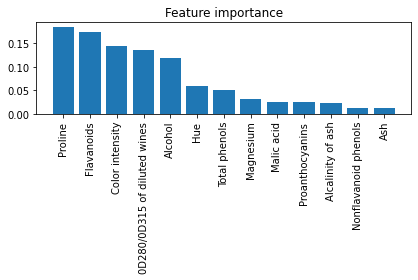

In [77]:
# graph importances of each feature
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

- Proline is the most discriminative features based on the average impurity decrease in the 500 decision trees
- 2 of the top ranked features, are also in the 3-feature subset we implemented above with SBS
- important caveat with random forest:
    - if 2 or more features are highly correlated, one feature may be ranked very highly while the information on other feature(s) may not be fully captured
    - On the other hand, we don't need to be too concerned with this if just concerned with the predictive performance of the model rather than interpretation of feature importance

###### Exploring the code

- list syntax for accessing list 'x' --> x[start:stop:step]

In [78]:
importances

array([0.11852942, 0.02564836, 0.01327854, 0.02236594, 0.03135708,
       0.05087243, 0.17475098, 0.01335393, 0.02556988, 0.1439199 ,
       0.058739  , 0.13616194, 0.1854526 ])

In [83]:
np.argsort(importances)

array([ 2,  7,  3,  8,  1,  4,  5, 10,  0, 11,  9,  6, 12], dtype=int64)

In [98]:
np.argsort(importances)[3] # returns 4th number (0 indexed)

8

In [102]:
np.argsort(importances)[-3] # returns 3rd from the right

9

In [104]:
np.argsort(importances)[:-3]

array([ 2,  7,  3,  8,  1,  4,  5, 10,  0, 11], dtype=int64)

In [108]:
indices # np.argsort(importances)[::-1] --> which just returns the last item in the list

array([12,  6,  9, 11,  0, 10,  5,  4,  1,  8,  3,  7,  2], dtype=int64)

###### done exploring

In [112]:
# can also select features based on user-specified threshold after model fitting
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meeth this threshold criterion: ', X_selected.shape[1])

for f in range(X_selected.shape[1]):
        print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

Number of features that meeth this threshold criterion:  5
 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) 0D280/0D315 of diluted wines   0.136162
 5) Alcohol                        0.118529
